<a href="https://colab.research.google.com/github/yellow-seed/aiit-machine-learning/blob/main/report2_concat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')

print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import datasets
from tensorflow.keras import utils

課題2 fileラベル
授業の例を基本形としてパラメータを一つずつ変更してみて変化について評価する

In [ ]:
(c100_x_train,c100_y_train),(c100_x_test,c100_y_test) = datasets.cifar100.load_data(label_mode='coarse')
(c10_x_train,c10_y_train),(c10_x_test,c10_y_test) = datasets.cifar10.load_data()

c10_y_train = np.apply_along_axis(lambda x: x + 20, 1, c10_y_train)
c10_y_test = np.apply_along_axis(lambda x: x + 20, 1, c10_y_test)

print('c100_x_train.shape: ', c100_x_train.shape)
print('c100_y_train.shape: ', c100_y_train.shape)
print('c100_x_test.shape: ', c100_x_test.shape)
print('c100_y_test.shape: ', c100_y_test.shape)

print('c10_x_train.shape: ', c10_x_train.shape)
print('c10_y_train.shape: ', c10_y_train.shape)
print('c10_x_test.shape: ', c10_x_test.shape)
print('c10_y_test.shape: ', c10_y_test.shape)

170498071/170498071 [==============================] - 2s 0us/step
c100_x_train.shape:  (50000, 32, 32, 3)
c100_y_train.shape:  (50000, 1)
c100_x_test.shape:  (10000, 32, 32, 3)
c100_y_test.shape:  (10000, 1)
c10_x_train.shape:  (50000, 32, 32, 3)
c10_y_train.shape:  (50000, 1)
c10_x_test.shape:  (10000, 32, 32, 3)
c10_y_test.shape:  (10000, 1)


In [ ]:
x_train = np.append(c100_x_train, c10_x_train, axis=0)/255 # 255で割るのはrgbの正規化
x_test = np.append(c100_x_test, c10_x_test, axis=0)/255
y_train = utils.to_categorical(np.append(c100_y_train, c10_y_train),30)
y_test = utils.to_categorical(np.append(c100_y_test, c10_y_test),30)

####################### ここまで共通 ###################################

####################### 比較の基準となるモデル###################################

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
2500/2500 [==============================] - 21s 5ms/step - loss: 2.6709 - acc: 0.2325 - val_loss: 2.0995 - val_acc: 0.4414
Epoch 2/20
2500/2500 [==============================] - 13s 5ms/step - loss: 2.2074 - acc: 0.3587 - val_loss: 1.6763 - val_acc: 0.5294
Epoch 3/20
2500/2500 [==============================] - 13s 5ms/step - loss: 2.0162 - acc: 0.4096 - val_loss: 1.5484 - val_acc: 0.5657
Epoch 4/20
2500/2500 [==============================] - 12s 5ms/step - loss: 1.9068 - acc: 0.4370 - val_loss: 1.5617 - val_acc: 0.5710
Epoch 5/20
2500/2500 [==============================] - 13s 5ms/step - loss: 1.8220 - acc: 0.4591 - val_loss: 1.4112 - val_acc: 0.6135
Epoch 6/20
2500/2500 [==============================] - 12s 5ms/step - loss: 1.7525 - acc: 0.4778 - val_loss: 1.4146 - val_acc: 0.6027
Epoch 7/20
2500/2500 [==============================] - 13s 5ms/step - loss: 1.6997 - acc: 0.4931 - val_loss: 1.4379 - val_acc: 0.6015
Epoch 8/20
2500/2500 [==============================] -

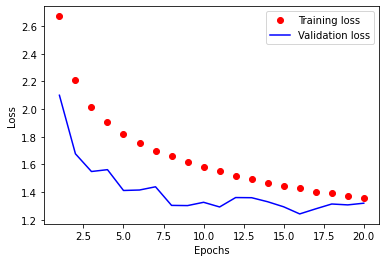

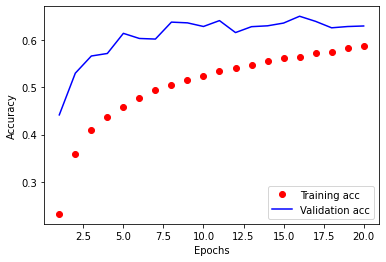

625/625 [==============================] - 2s 3ms/step - loss: 1.4809 - acc: 0.5666
[1.480852484703064, 0.5666499733924866]
CPU times: user 5min 38s, sys: 40.2 s, total: 6min 18s
Wall time: 4min 23s


In [ ]:
%%time
model = models.Sequential()
model.add(
    layers.Conv2D(
        filters=32,
        input_shape=(32,32,3),
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Dropout(0.25))

model.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=30, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(lr=0.001),
    metrics=['acc']
)

model.summary()

history=model.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.2)

history_dict=history.history 
loss=history_dict['loss'] 
val_loss=history_dict['val_loss'] 
acc=history_dict['acc'] 
val_acc=history_dict['val_acc'] 
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend() 
plt.figure()
plt.plot(epochs,acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(model.evaluate(x_test, y_test))

色々と設定条件を変えてみる

方針として



1.   Conv2Dのパラメータ変更(filters, kernel_size, strides, padding)
* filters=48, filters=64
* kernel_size=(6,6), kernel_size=(9,9)
* strides=(3,3), strides=(5,5)

1.   学習パラメータ変更(epoch数, batch_size, validation_splitの変更)
* epoch=100, 1000, 10000
* batch_size=48, 64
* validation_split=0.4, 0.6

1.   層の数をより増やす(+1, +2, +3)

1. optimizerの変更(lrについては同じ値とする)
*   SGD
*   Adagrad
*.  RMSprop






Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 48)        1344      
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 48)        20784     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 48)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 48)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 48)        20784     
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 48)        20784     
                                                      

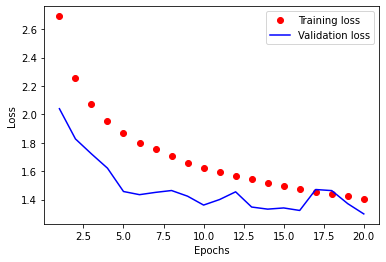

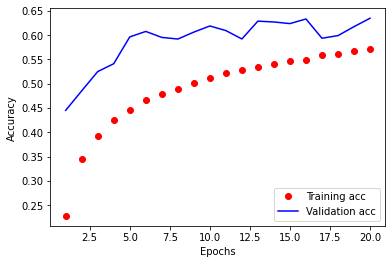

625/625 [==============================] - 2s 3ms/step - loss: 1.5172 - acc: 0.5575
[1.5172450542449951, 0.5575000047683716]
CPU times: user 5min 32s, sys: 38.7 s, total: 6min 10s
Wall time: 4min 12s


In [ ]:
%%time
conv2D_filter_48_model = models.Sequential()
conv2D_filter_48_model.add(
    layers.Conv2D(
        filters=48,
        input_shape=(32,32,3),
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

conv2D_filter_48_model.add(
    layers.Conv2D(
        filters=48,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

conv2D_filter_48_model.add(layers.MaxPooling2D(pool_size=(2,2)))

conv2D_filter_48_model.add(layers.Dropout(0.25))

conv2D_filter_48_model.add(
    layers.Conv2D(
        filters=48,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

conv2D_filter_48_model.add(
    layers.Conv2D(
        filters=48,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

conv2D_filter_48_model.add(layers.MaxPooling2D(pool_size=(2,2)))
conv2D_filter_48_model.add(layers.Dropout(0.25))

conv2D_filter_48_model.add(layers.Flatten())
conv2D_filter_48_model.add(layers.Dense(units=512, activation='relu'))
conv2D_filter_48_model.add(layers.Dropout(0.5))
conv2D_filter_48_model.add(layers.Dense(units=30, activation='softmax'))

conv2D_filter_48_model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(lr=0.001),
    metrics=['acc']
)

conv2D_filter_48_model.summary()

history=conv2D_filter_48_model.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.2)

history_dict=history.history 
loss=history_dict['loss'] 
val_loss=history_dict['val_loss'] 
acc=history_dict['acc'] 
val_acc=history_dict['val_acc'] 
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend() 
plt.figure()
plt.plot(epochs,acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(conv2D_filter_48_model.evaluate(x_test, y_test))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

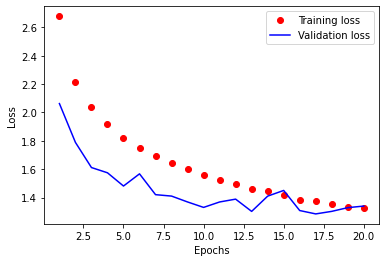

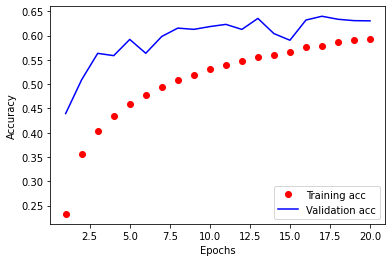

625/625 [==============================] - 1s 2ms/step - loss: 1.5170 - acc: 0.5617
[1.5170191526412964, 0.5617499947547913]
CPU times: user 5min 46s, sys: 39.5 s, total: 6min 25s
Wall time: 4min 25s


In [ ]:
%%time
conv2D_filter_64_model = models.Sequential()
conv2D_filter_64_model.add(
    layers.Conv2D(
        filters=64,
        input_shape=(32,32,3),
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

conv2D_filter_64_model.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

conv2D_filter_64_model.add(layers.MaxPooling2D(pool_size=(2,2)))

conv2D_filter_64_model.add(layers.Dropout(0.25))

conv2D_filter_64_model.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

conv2D_filter_64_model.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

conv2D_filter_64_model.add(layers.MaxPooling2D(pool_size=(2,2)))
conv2D_filter_64_model.add(layers.Dropout(0.25))

conv2D_filter_64_model.add(layers.Flatten())
conv2D_filter_64_model.add(layers.Dense(units=512, activation='relu'))
conv2D_filter_64_model.add(layers.Dropout(0.5))
conv2D_filter_64_model.add(layers.Dense(units=30, activation='softmax'))

conv2D_filter_64_model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(lr=0.001),
    metrics=['acc']
)

conv2D_filter_64_model.summary()

history=conv2D_filter_64_model.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.2)

history_dict=history.history 
loss=history_dict['loss'] 
val_loss=history_dict['val_loss'] 
acc=history_dict['acc'] 
val_acc=history_dict['val_acc'] 
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend() 
plt.figure()
plt.plot(epochs,acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(conv2D_filter_64_model.evaluate(x_test, y_test))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        3488      
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        36896     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 64)        73792     
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 64)        147520    
                                                      

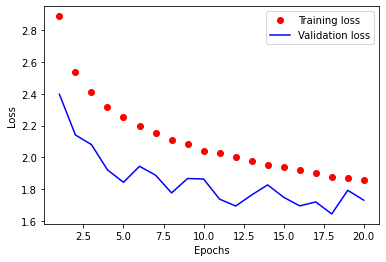

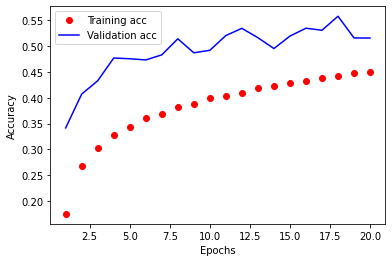

625/625 [==============================] - 2s 3ms/step - loss: 1.9098 - acc: 0.4560
[1.9098460674285889, 0.4560000002384186]
CPU times: user 5min 7s, sys: 38.1 s, total: 5min 45s
Wall time: 3min 55s


In [ ]:
%%time
model_kernel_66 = models.Sequential()
model_kernel_66.add(
    layers.Conv2D(
        filters=32,
        input_shape=(32,32,3),
        kernel_size=(6,6),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_kernel_66.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(6,6),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_kernel_66.add(layers.MaxPooling2D(pool_size=(2,2)))

model_kernel_66.add(layers.Dropout(0.25))

model_kernel_66.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(6,6),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_kernel_66.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(6,6),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_kernel_66.add(layers.MaxPooling2D(pool_size=(2,2)))
model_kernel_66.add(layers.Dropout(0.25))

model_kernel_66.add(layers.Flatten())
model_kernel_66.add(layers.Dense(units=512, activation='relu'))
model_kernel_66.add(layers.Dropout(0.5))
model_kernel_66.add(layers.Dense(units=30, activation='softmax'))

model_kernel_66.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(lr=0.001),
    metrics=['acc']
)

model_kernel_66.summary()

history=model_kernel_66.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.2)

history_dict=history.history 
loss=history_dict['loss'] 
val_loss=history_dict['val_loss'] 
acc=history_dict['acc'] 
val_acc=history_dict['val_acc'] 
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend() 
plt.figure()
plt.plot(epochs,acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(model_kernel_66.evaluate(x_test, y_test))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        7808      
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 32)        82976     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_18 (Conv2D)          (None, 16, 16, 64)        165952    
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 64)        331840    
                                                      

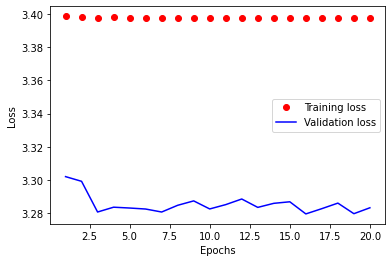

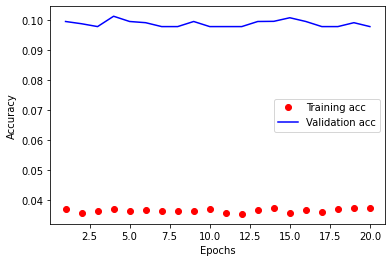

625/625 [==============================] - 2s 2ms/step - loss: 3.3746 - acc: 0.0500
[3.3745782375335693, 0.05000000074505806]
CPU times: user 5min 8s, sys: 37.7 s, total: 5min 46s
Wall time: 3min 54s


In [ ]:
%%time
model_kernel_99 = models.Sequential()
model_kernel_99.add(
    layers.Conv2D(
        filters=32,
        input_shape=(32,32,3),
        kernel_size=(9,9),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_kernel_99.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(9,9),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_kernel_99.add(layers.MaxPooling2D(pool_size=(2,2)))

model_kernel_99.add(layers.Dropout(0.25))

model_kernel_99.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(9,9),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_kernel_99.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(9,9),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_kernel_99.add(layers.MaxPooling2D(pool_size=(2,2)))
model_kernel_99.add(layers.Dropout(0.25))

model_kernel_99.add(layers.Flatten())
model_kernel_99.add(layers.Dense(units=512, activation='relu'))
model_kernel_99.add(layers.Dropout(0.5))
model_kernel_99.add(layers.Dense(units=30, activation='softmax'))

model_kernel_99.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(lr=0.001),
    metrics=['acc']
)

model_kernel_99.summary()

history=model_kernel_99.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.2)

history_dict=history.history 
loss=history_dict['loss'] 
val_loss=history_dict['val_loss'] 
acc=history_dict['acc'] 
val_acc=history_dict['val_acc'] 
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend() 
plt.figure()
plt.plot(epochs,acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(model_kernel_99.evaluate(x_test, y_test))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 11, 11, 32)        896       
                                                                 
 conv2d_21 (Conv2D)          (None, 4, 4, 32)          9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 2, 2, 32)         0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 2, 2, 32)          0         
                                                                 
 conv2d_22 (Conv2D)          (None, 2, 2, 64)          18496     
                                                                 
 conv2d_23 (Conv2D)          (None, 2, 2, 64)          36928     
                                                      

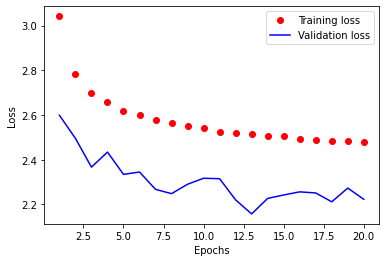

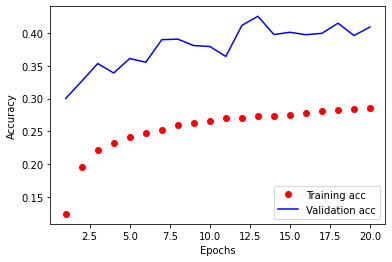

625/625 [==============================] - 1s 2ms/step - loss: 2.3761 - acc: 0.3270
[2.3760907649993896, 0.3269999921321869]
CPU times: user 4min 26s, sys: 36.7 s, total: 5min 3s
Wall time: 3min 15s


In [ ]:
%%time
model_strides_33 = models.Sequential()
model_strides_33.add(
    layers.Conv2D(
        filters=32,
        input_shape=(32,32,3),
        kernel_size=(3,3),
        strides=(3,3),
        padding='same',
        activation='relu'
    )
)

model_strides_33.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(3,3),
        padding='same',
        activation='relu'
    )
)

model_strides_33.add(layers.MaxPooling2D(pool_size=(2,2)))

model_strides_33.add(layers.Dropout(0.25))

model_strides_33.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_strides_33.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_strides_33.add(layers.MaxPooling2D(pool_size=(2,2)))
model_strides_33.add(layers.Dropout(0.25))

model_strides_33.add(layers.Flatten())
model_strides_33.add(layers.Dense(units=512, activation='relu'))
model_strides_33.add(layers.Dropout(0.5))
model_strides_33.add(layers.Dense(units=30, activation='softmax'))

model_strides_33.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(lr=0.001),
    metrics=['acc']
)

model_strides_33.summary()

history=model_strides_33.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.2)

history_dict=history.history 
loss=history_dict['loss'] 
val_loss=history_dict['val_loss'] 
acc=history_dict['acc'] 
val_acc=history_dict['val_acc'] 
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend() 
plt.figure()
plt.plot(epochs,acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(model_strides_33.evaluate(x_test, y_test))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_26 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_27 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

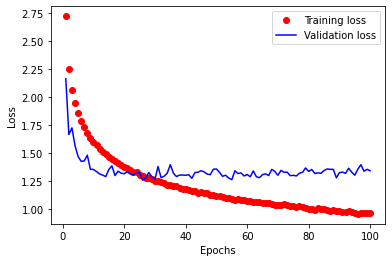

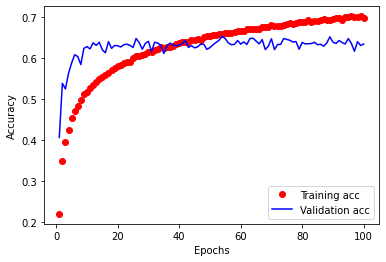

625/625 [==============================] - 1s 2ms/step - loss: 1.5855 - acc: 0.5615
[1.585466742515564, 0.5615000128746033]
CPU times: user 23min 44s, sys: 3min 2s, total: 26min 46s
Wall time: 17min 41s


In [ ]:
%%time
model_epoch_100 = models.Sequential()
model_epoch_100.add(
    layers.Conv2D(
        filters=32,
        input_shape=(32,32,3),
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_epoch_100.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_epoch_100.add(layers.MaxPooling2D(pool_size=(2,2)))

model_epoch_100.add(layers.Dropout(0.25))

model_epoch_100.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_epoch_100.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_epoch_100.add(layers.MaxPooling2D(pool_size=(2,2)))
model_epoch_100.add(layers.Dropout(0.25))

model_epoch_100.add(layers.Flatten())
model_epoch_100.add(layers.Dense(units=512, activation='relu'))
model_epoch_100.add(layers.Dropout(0.5))
model_epoch_100.add(layers.Dense(units=30, activation='softmax'))

model_epoch_100.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(lr=0.001),
    metrics=['acc']
)

model_epoch_100.summary()

history=model_epoch_100.fit(x_train,y_train,epochs=100,batch_size=32,validation_split=0.2)

history_dict=history.history 
loss=history_dict['loss'] 
val_loss=history_dict['val_loss'] 
acc=history_dict['acc'] 
val_acc=history_dict['val_acc'] 
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend() 
plt.figure()
plt.plot(epochs,acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(model_epoch_100.evaluate(x_test, y_test))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_29 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_30 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_31 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

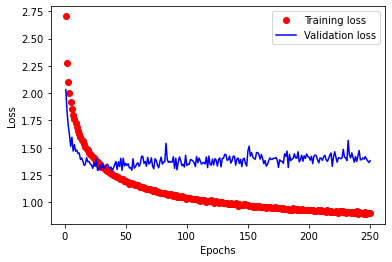

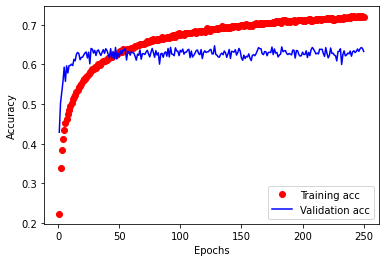

625/625 [==============================] - 2s 2ms/step - loss: 1.6361 - acc: 0.5681
[1.6360918283462524, 0.568149983882904]
CPU times: user 58min 24s, sys: 7min 22s, total: 1h 5min 46s
Wall time: 43min 36s


In [ ]:
%%time
model_epoch_250 = models.Sequential()
model_epoch_250.add(
    layers.Conv2D(
        filters=32,
        input_shape=(32,32,3),
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_epoch_250.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_epoch_250.add(layers.MaxPooling2D(pool_size=(2,2)))

model_epoch_250.add(layers.Dropout(0.25))

model_epoch_250.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_epoch_250.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_epoch_250.add(layers.MaxPooling2D(pool_size=(2,2)))
model_epoch_250.add(layers.Dropout(0.25))

model_epoch_250.add(layers.Flatten())
model_epoch_250.add(layers.Dense(units=512, activation='relu'))
model_epoch_250.add(layers.Dropout(0.5))
model_epoch_250.add(layers.Dense(units=30, activation='softmax'))

model_epoch_250.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(lr=0.001),
    metrics=['acc']
)

model_epoch_250.summary()

history=model_epoch_250.fit(x_train,y_train,epochs=250,batch_size=32,validation_split=0.2)

history_dict=history.history 
loss=history_dict['loss'] 
val_loss=history_dict['val_loss'] 
acc=history_dict['acc'] 
val_acc=history_dict['val_acc'] 
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend() 
plt.figure()
plt.plot(epochs,acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(model_epoch_250.evaluate(x_test, y_test))

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_33 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_34 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_35 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

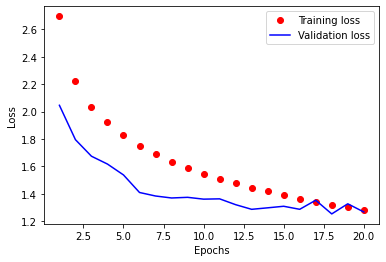

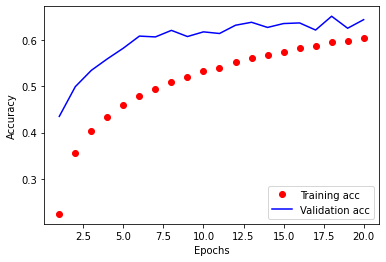

625/625 [==============================] - 2s 3ms/step - loss: 1.4433 - acc: 0.5814
[1.4432860612869263, 0.5813500285148621]
CPU times: user 3min 41s, sys: 29 s, total: 4min 10s
Wall time: 2min 39s


In [ ]:
%%time
model_batchsize_48 = models.Sequential()
model_batchsize_48.add(
    layers.Conv2D(
        filters=32,
        input_shape=(32,32,3),
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_batchsize_48.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_batchsize_48.add(layers.MaxPooling2D(pool_size=(2,2)))

model_batchsize_48.add(layers.Dropout(0.25))

model_batchsize_48.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_batchsize_48.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_batchsize_48.add(layers.MaxPooling2D(pool_size=(2,2)))
model_batchsize_48.add(layers.Dropout(0.25))

model_batchsize_48.add(layers.Flatten())
model_batchsize_48.add(layers.Dense(units=512, activation='relu'))
model_batchsize_48.add(layers.Dropout(0.5))
model_batchsize_48.add(layers.Dense(units=30, activation='softmax'))

model_batchsize_48.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(lr=0.001),
    metrics=['acc']
)

model_batchsize_48.summary()

history=model_batchsize_48.fit(x_train,y_train,epochs=20,batch_size=48,validation_split=0.2)

history_dict=history.history 
loss=history_dict['loss'] 
val_loss=history_dict['val_loss'] 
acc=history_dict['acc'] 
val_acc=history_dict['val_acc'] 
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend() 
plt.figure()
plt.plot(epochs,acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(model_batchsize_48.evaluate(x_test, y_test))

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_37 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_27 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_38 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_39 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

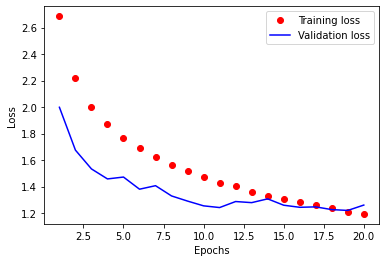

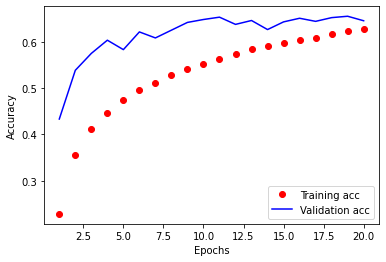

625/625 [==============================] - 2s 3ms/step - loss: 1.4211 - acc: 0.5820
[1.4210882186889648, 0.5820000171661377]
CPU times: user 2min 32s, sys: 19.6 s, total: 2min 52s
Wall time: 1min 52s


In [ ]:
%%time
model_batchsize_64 = models.Sequential()
model_batchsize_64.add(
    layers.Conv2D(
        filters=32,
        input_shape=(32,32,3),
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_batchsize_64.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_batchsize_64.add(layers.MaxPooling2D(pool_size=(2,2)))

model_batchsize_64.add(layers.Dropout(0.25))

model_batchsize_64.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_batchsize_64.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_batchsize_64.add(layers.MaxPooling2D(pool_size=(2,2)))
model_batchsize_64.add(layers.Dropout(0.25))

model_batchsize_64.add(layers.Flatten())
model_batchsize_64.add(layers.Dense(units=512, activation='relu'))
model_batchsize_64.add(layers.Dropout(0.5))
model_batchsize_64.add(layers.Dense(units=30, activation='softmax'))

model_batchsize_64.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(lr=0.001),
    metrics=['acc']
)

model_batchsize_64.summary()

history=model_batchsize_64.fit(x_train,y_train,epochs=20,batch_size=64,validation_split=0.2)

history_dict=history.history 
loss=history_dict['loss'] 
val_loss=history_dict['val_loss'] 
acc=history_dict['acc'] 
val_acc=history_dict['val_acc'] 
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend() 
plt.figure()
plt.plot(epochs,acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(model_batchsize_64.evaluate(x_test, y_test))

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_41 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_30 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_42 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_43 (Conv2D)          (None, 16, 16, 64)        36928     
                                                     

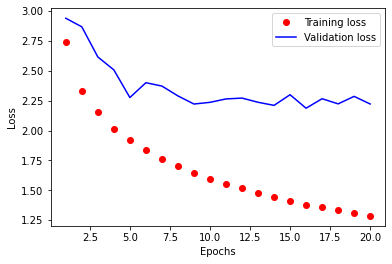

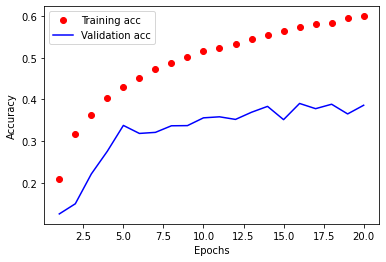

625/625 [==============================] - 1s 2ms/step - loss: 1.8685 - acc: 0.4699
[1.8684535026550293, 0.46985000371932983]
CPU times: user 4min 13s, sys: 32.9 s, total: 4min 46s
Wall time: 3min 10s


In [ ]:
%%time
model_validation_split04 = models.Sequential()
model_validation_split04.add(
    layers.Conv2D(
        filters=32,
        input_shape=(32,32,3),
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_validation_split04.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_validation_split04.add(layers.MaxPooling2D(pool_size=(2,2)))

model_validation_split04.add(layers.Dropout(0.25))

model_validation_split04.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_validation_split04.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_validation_split04.add(layers.MaxPooling2D(pool_size=(2,2)))
model_validation_split04.add(layers.Dropout(0.25))

model_validation_split04.add(layers.Flatten())
model_validation_split04.add(layers.Dense(units=512, activation='relu'))
model_validation_split04.add(layers.Dropout(0.5))
model_validation_split04.add(layers.Dense(units=30, activation='softmax'))

model_validation_split04.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(lr=0.001),
    metrics=['acc']
)

model_validation_split04.summary()

history=model_validation_split04.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.4)

history_dict=history.history 
loss=history_dict['loss'] 
val_loss=history_dict['val_loss'] 
acc=history_dict['acc'] 
val_acc=history_dict['val_acc'] 
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend() 
plt.figure()
plt.plot(epochs,acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(model_validation_split04.evaluate(x_test, y_test))

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_45 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_33 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_46 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_47 (Conv2D)          (None, 16, 16, 64)        36928     
                                                     

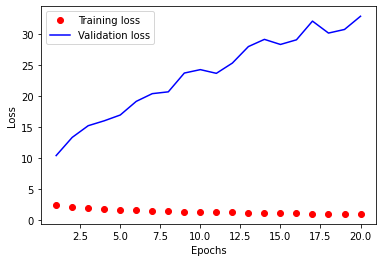

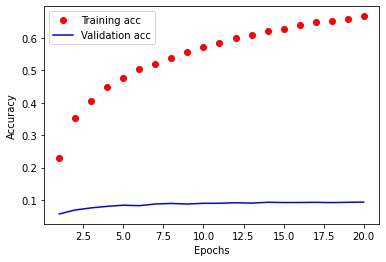

625/625 [==============================] - 1s 2ms/step - loss: 20.2893 - acc: 0.2778
[20.28933334350586, 0.2777999937534332]
CPU times: user 3min 45s, sys: 29.6 s, total: 4min 15s
Wall time: 2min 48s


In [ ]:
%%time
model_validation_split06 = models.Sequential()
model_validation_split06.add(
    layers.Conv2D(
        filters=32,
        input_shape=(32,32,3),
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_validation_split06.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_validation_split06.add(layers.MaxPooling2D(pool_size=(2,2)))

model_validation_split06.add(layers.Dropout(0.25))

model_validation_split06.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_validation_split06.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_validation_split06.add(layers.MaxPooling2D(pool_size=(2,2)))
model_validation_split06.add(layers.Dropout(0.25))

model_validation_split06.add(layers.Flatten())
model_validation_split06.add(layers.Dense(units=512, activation='relu'))
model_validation_split06.add(layers.Dropout(0.5))
model_validation_split06.add(layers.Dense(units=30, activation='softmax'))

model_validation_split06.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(lr=0.001),
    metrics=['acc']
)

model_validation_split06.summary()

history=model_validation_split06.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.6)

history_dict=history.history 
loss=history_dict['loss'] 
val_loss=history_dict['val_loss'] 
acc=history_dict['acc'] 
val_acc=history_dict['val_acc'] 
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend() 
plt.figure()
plt.plot(epochs,acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(model_validation_split06.evaluate(x_test, y_test))

# レイヤーの追加

方針


*   Conv2Dを追加した層
*   そこにプーリング層とドロップアウト層を追加



Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_49 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 conv2d_50 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_36 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_51 (Conv2D)          (None, 16, 16, 64)        18496     
                                                     

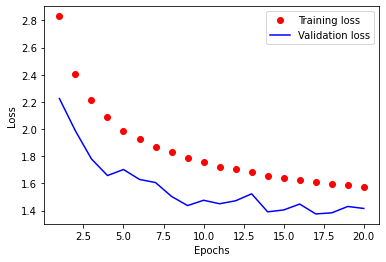

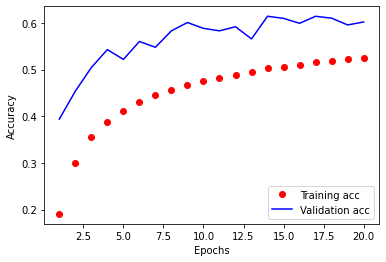

625/625 [==============================] - 2s 3ms/step - loss: 1.5725 - acc: 0.5382
[1.5725089311599731, 0.5382000207901001]
CPU times: user 5min 15s, sys: 38.3 s, total: 5min 53s
Wall time: 4min 4s


In [ ]:
%%time
model_add_Conv2D_layer = models.Sequential()
model_add_Conv2D_layer.add(
    layers.Conv2D(
        filters=32,
        input_shape=(32,32,3),
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_add_Conv2D_layer.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_add_Conv2D_layer.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_add_Conv2D_layer.add(layers.MaxPooling2D(pool_size=(2,2)))

model_add_Conv2D_layer.add(layers.Dropout(0.25))

model_add_Conv2D_layer.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_add_Conv2D_layer.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_add_Conv2D_layer.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_add_Conv2D_layer.add(layers.MaxPooling2D(pool_size=(2,2)))
model_add_Conv2D_layer.add(layers.Dropout(0.25))

model_add_Conv2D_layer.add(layers.Flatten())
model_add_Conv2D_layer.add(layers.Dense(units=512, activation='relu'))
model_add_Conv2D_layer.add(layers.Dropout(0.5))
model_add_Conv2D_layer.add(layers.Dense(units=30, activation='softmax'))

model_add_Conv2D_layer.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(lr=0.001),
    metrics=['acc']
)

model_add_Conv2D_layer.summary()

history=model_add_Conv2D_layer.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.2)

history_dict=history.history 
loss=history_dict['loss'] 
val_loss=history_dict['val_loss'] 
acc=history_dict['acc'] 
val_acc=history_dict['val_acc'] 
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend() 
plt.figure()
plt.plot(epochs,acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(model_add_Conv2D_layer.evaluate(x_test, y_test))

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_55 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 conv2d_56 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_39 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_57 (Conv2D)          (None, 16, 16, 64)        18496     
                                                     

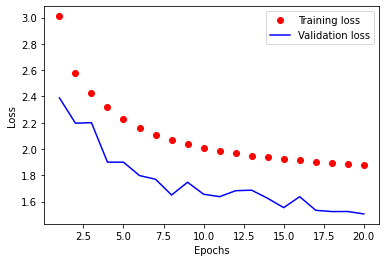

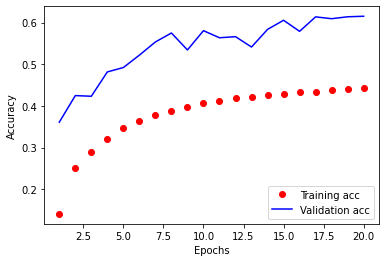

625/625 [==============================] - 2s 3ms/step - loss: 1.7143 - acc: 0.5114
[1.7143012285232544, 0.5114499926567078]
CPU times: user 5min 18s, sys: 38.3 s, total: 5min 57s
Wall time: 4min 8s


In [ ]:
%%time
model_add_pooling_layer = models.Sequential()
model_add_pooling_layer.add(
    layers.Conv2D(
        filters=32,
        input_shape=(32,32,3),
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_add_pooling_layer.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_add_pooling_layer.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_add_pooling_layer.add(layers.MaxPooling2D(pool_size=(2,2)))

model_add_pooling_layer.add(layers.Dropout(0.25))

model_add_pooling_layer.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_add_pooling_layer.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_add_pooling_layer.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_add_pooling_layer.add(layers.MaxPooling2D(pool_size=(2,2)))
model_add_pooling_layer.add(layers.Dropout(0.25))

model_add_pooling_layer.add(layers.MaxPooling2D(pool_size=(2,2)))
model_add_pooling_layer.add(layers.Dropout(0.25))

model_add_pooling_layer.add(layers.Flatten())
model_add_pooling_layer.add(layers.Dense(units=512, activation='relu'))
model_add_pooling_layer.add(layers.Dropout(0.5))
model_add_pooling_layer.add(layers.Dense(units=30, activation='softmax'))

model_add_pooling_layer.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(lr=0.001),
    metrics=['acc']
)

model_add_pooling_layer.summary()

history=model_add_pooling_layer.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.2)

history_dict=history.history 
loss=history_dict['loss'] 
val_loss=history_dict['val_loss'] 
acc=history_dict['acc'] 
val_acc=history_dict['val_acc'] 
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend() 
plt.figure()
plt.plot(epochs,acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(model_add_pooling_layer.evaluate(x_test, y_test))

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_61 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_43 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_62 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_63 (Conv2D)          (None, 16, 16, 64)        36928     
                                                     

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
2500/2500 [==============================] - 11s 4ms/step - loss: 3.3989 - acc: 0.0374 - val_loss: 3.3625 - val_acc: 0.1208
Epoch 2/20
2500/2500 [==============================] - 10s 4ms/step - loss: 3.3874 - acc: 0.0476 - val_loss: 3.3123 - val_acc: 0.1092
Epoch 3/20
2500/2500 [==============================] - 10s 4ms/step - loss: 3.3322 - acc: 0.0650 - val_loss: 3.1633 - val_acc: 0.1347
Epoch 4/20
2500/2500 [==============================] - 10s 4ms/step - loss: 3.2210 - acc: 0.0864 - val_loss: 3.0385 - val_acc: 0.1769
Epoch 5/20
2500/2500 [==============================] - 10s 4ms/step - loss: 3.1581 - acc: 0.1013 - val_loss: 3.0076 - val_acc: 0.1937
Epoch 6/20
2500/2500 [==============================] - 10s 4ms/step - loss: 3.1179 - acc: 0.1126 - val_loss: 2.9683 - val_acc: 0.2022
Epoch 7/20
2500/2500 [==============================] - 10s 4ms/step - loss: 3.0813 - acc: 0.1253 - val_loss: 2.9392 - val_acc: 0.2155
Epoch 8/20
2500/2500 [==============================] -

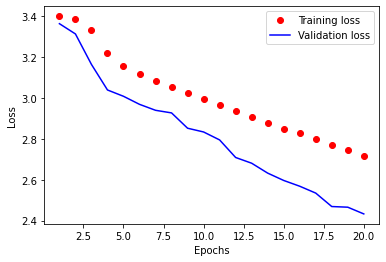

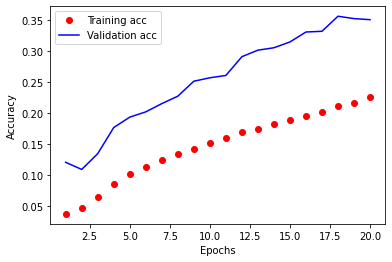

625/625 [==============================] - 1s 2ms/step - loss: 2.5821 - acc: 0.2727
[2.58206844329834, 0.2727000117301941]
CPU times: user 4min 35s, sys: 36.2 s, total: 5min 11s
Wall time: 3min 26s


In [ ]:
%%time
model_optimizer_sgd = models.Sequential()
model_optimizer_sgd.add(
    layers.Conv2D(
        filters=32,
        input_shape=(32,32,3),
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_optimizer_sgd.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_optimizer_sgd.add(layers.MaxPooling2D(pool_size=(2,2)))

model_optimizer_sgd.add(layers.Dropout(0.25))

model_optimizer_sgd.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_optimizer_sgd.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_optimizer_sgd.add(layers.MaxPooling2D(pool_size=(2,2)))
model_optimizer_sgd.add(layers.Dropout(0.25))

model_optimizer_sgd.add(layers.Flatten())
model_optimizer_sgd.add(layers.Dense(units=512, activation='relu'))
model_optimizer_sgd.add(layers.Dropout(0.5))
model_optimizer_sgd.add(layers.Dense(units=30, activation='softmax'))

model_optimizer_sgd.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.SGD(lr=0.001),
    metrics=['acc']
)

model_optimizer_sgd.summary()

history=model_optimizer_sgd.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.2)

history_dict=history.history 
loss=history_dict['loss'] 
val_loss=history_dict['val_loss'] 
acc=history_dict['acc'] 
val_acc=history_dict['val_acc'] 
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend() 
plt.figure()
plt.plot(epochs,acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(model_optimizer_sgd.evaluate(x_test, y_test))

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_64 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_65 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_46 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_66 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_67 (Conv2D)          (None, 16, 16, 64)        36928     
                                                     

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adagrad.py:77: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adagrad, self).__init__(name, **kwargs)


Epoch 1/20
2500/2500 [==============================] - 11s 4ms/step - loss: 3.3901 - acc: 0.0445 - val_loss: 3.2724 - val_acc: 0.1482
Epoch 2/20
2500/2500 [==============================] - 10s 4ms/step - loss: 3.2409 - acc: 0.0846 - val_loss: 3.0239 - val_acc: 0.1840
Epoch 3/20
2500/2500 [==============================] - 10s 4ms/step - loss: 3.1185 - acc: 0.1142 - val_loss: 2.9404 - val_acc: 0.2222
Epoch 4/20
2500/2500 [==============================] - 10s 4ms/step - loss: 3.0537 - acc: 0.1337 - val_loss: 2.8558 - val_acc: 0.2573
Epoch 5/20
2500/2500 [==============================] - 10s 4ms/step - loss: 3.0031 - acc: 0.1490 - val_loss: 2.8003 - val_acc: 0.2754
Epoch 6/20
2500/2500 [==============================] - 10s 4ms/step - loss: 2.9445 - acc: 0.1653 - val_loss: 2.6940 - val_acc: 0.2995
Epoch 7/20
2500/2500 [==============================] - 10s 4ms/step - loss: 2.8922 - acc: 0.1796 - val_loss: 2.6090 - val_acc: 0.3191
Epoch 8/20
2500/2500 [==============================] -

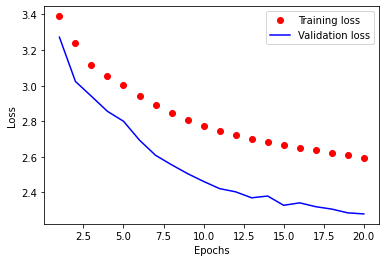

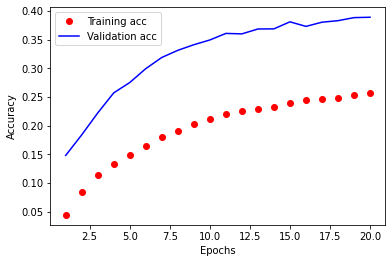

625/625 [==============================] - 1s 2ms/step - loss: 2.4425 - acc: 0.3106
[2.442462205886841, 0.31060001254081726]
CPU times: user 4min 40s, sys: 35.6 s, total: 5min 15s
Wall time: 3min 30s


In [ ]:
%%time
model_optimizer_adagrad = models.Sequential()
model_optimizer_adagrad.add(
    layers.Conv2D(
        filters=32,
        input_shape=(32,32,3),
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_optimizer_adagrad.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_optimizer_adagrad.add(layers.MaxPooling2D(pool_size=(2,2)))

model_optimizer_adagrad.add(layers.Dropout(0.25))

model_optimizer_adagrad.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_optimizer_adagrad.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_optimizer_adagrad.add(layers.MaxPooling2D(pool_size=(2,2)))
model_optimizer_adagrad.add(layers.Dropout(0.25))

model_optimizer_adagrad.add(layers.Flatten())
model_optimizer_adagrad.add(layers.Dense(units=512, activation='relu'))
model_optimizer_adagrad.add(layers.Dropout(0.5))
model_optimizer_adagrad.add(layers.Dense(units=30, activation='softmax'))

model_optimizer_adagrad.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adagrad(lr=0.001),
    metrics=['acc']
)

model_optimizer_adagrad.summary()

history=model_optimizer_adagrad.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.2)

history_dict=history.history 
loss=history_dict['loss'] 
val_loss=history_dict['val_loss'] 
acc=history_dict['acc'] 
val_acc=history_dict['val_acc'] 
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend() 
plt.figure()
plt.plot(epochs,acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(model_optimizer_adagrad.evaluate(x_test, y_test))

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_68 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_69 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_49 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_70 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_71 (Conv2D)          (None, 16, 16, 64)        36928     
                                                     

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/20
2500/2500 [==============================] - 13s 5ms/step - loss: 2.6345 - acc: 0.2462 - val_loss: 1.8626 - val_acc: 0.4750
Epoch 2/20
2500/2500 [==============================] - 12s 5ms/step - loss: 2.2022 - acc: 0.3658 - val_loss: 1.6511 - val_acc: 0.5410
Epoch 3/20
2500/2500 [==============================] - 12s 5ms/step - loss: 2.1088 - acc: 0.3953 - val_loss: 1.7740 - val_acc: 0.5267
Epoch 4/20
2500/2500 [==============================] - 12s 5ms/step - loss: 2.1271 - acc: 0.3967 - val_loss: 1.6245 - val_acc: 0.5398
Epoch 5/20
2500/2500 [==============================] - 12s 5ms/step - loss: 2.1918 - acc: 0.3868 - val_loss: 1.6281 - val_acc: 0.5574
Epoch 6/20
2500/2500 [==============================] - 12s 5ms/step - loss: 2.2718 - acc: 0.3673 - val_loss: 1.7481 - val_acc: 0.5195
Epoch 7/20
2500/2500 [==============================] - 12s 5ms/step - loss: 2.3461 - acc: 0.3512 - val_loss: 1.7236 - val_acc: 0.5263
Epoch 8/20
2500/2500 [==============================] -

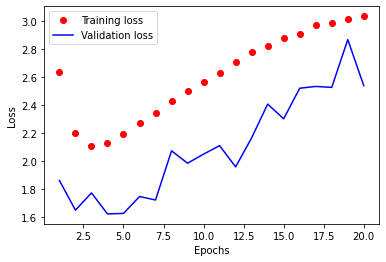

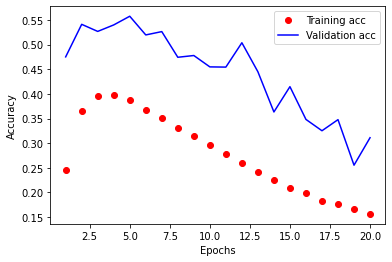

625/625 [==============================] - 1s 2ms/step - loss: 2.7806 - acc: 0.2093
[2.7806336879730225, 0.20925000309944153]
CPU times: user 5min 17s, sys: 37.8 s, total: 5min 54s
Wall time: 4min 2s


In [ ]:
%%time
model_optimizer_RMSprop = models.Sequential()
model_optimizer_RMSprop.add(
    layers.Conv2D(
        filters=32,
        input_shape=(32,32,3),
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_optimizer_RMSprop.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_optimizer_RMSprop.add(layers.MaxPooling2D(pool_size=(2,2)))

model_optimizer_RMSprop.add(layers.Dropout(0.25))

model_optimizer_RMSprop.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_optimizer_RMSprop.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_optimizer_RMSprop.add(layers.MaxPooling2D(pool_size=(2,2)))
model_optimizer_RMSprop.add(layers.Dropout(0.25))

model_optimizer_RMSprop.add(layers.Flatten())
model_optimizer_RMSprop.add(layers.Dense(units=512, activation='relu'))
model_optimizer_RMSprop.add(layers.Dropout(0.5))
model_optimizer_RMSprop.add(layers.Dense(units=30, activation='softmax'))

model_optimizer_RMSprop.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.RMSprop(lr=0.001),
    metrics=['acc']
)

model_optimizer_RMSprop.summary()

history=model_optimizer_RMSprop.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.2)

history_dict=history.history 
loss=history_dict['loss'] 
val_loss=history_dict['val_loss'] 
acc=history_dict['acc'] 
val_acc=history_dict['val_acc'] 
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend() 
plt.figure()
plt.plot(epochs,acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(model_optimizer_RMSprop.evaluate(x_test, y_test))